In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

import matplotlib
# matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

df_1 = pd.read_csv("../output/task2-1.csv")
df_2 = pd.read_csv("../output/task2-2.csv")
df_2_total = pd.read_csv("../output/task2-2-total.csv")

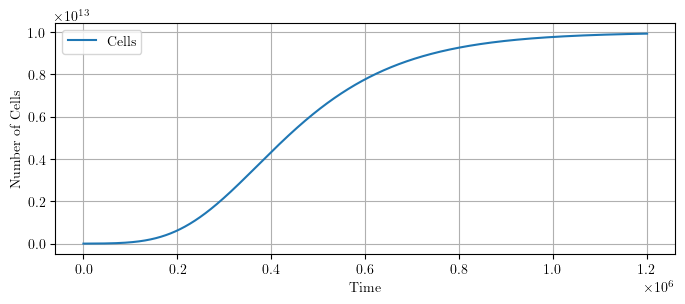

In [17]:
# plot the number of cells over time
plt.figure(figsize=(8, 3))
plt.plot(df_1['time'], df_1['cells'], label='Cells')
plt.xlabel('Time')
plt.ylabel('Number of Cells')
plt.legend()
plt.grid(True)
plt.show()

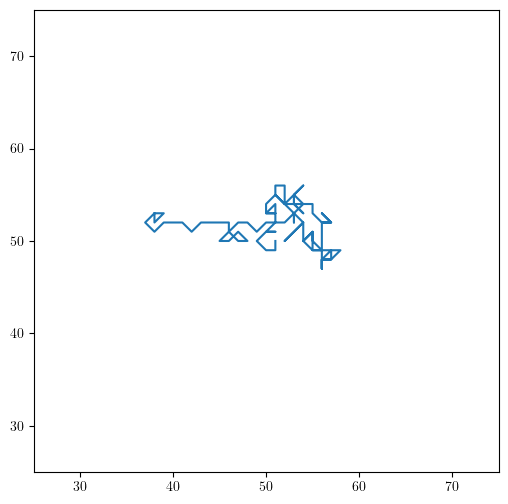

In [18]:
plt.figure(figsize=(6, 6))
plt.plot(df_2['x'], df_2['y'], label='task2-2')
plt.xlim(25,75)
plt.ylim(25,75)
plt.show()

In [19]:
# Load all .csv file
data = {}
for file in os.listdir("../output/bulk-m"):
    if file.endswith(".csv"):
        name = file.split(".")[0]
        record = {}
        record["df"] = pd.read_csv(f"../output/bulk-m/{file}")
        # log to base 10 for power
        record["m"] = int(name[8:])
        data[name] = record

for name, record in data.items():
    dt = 0.001
    record['df']['time'] = record['df']['time'] * dt

/Users/nathanrignall/.pyenv/versions/3.10.2/envs/uni-ml/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


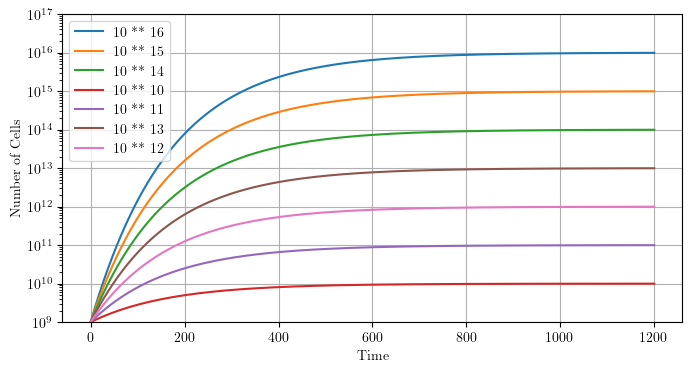

10

In [20]:
# plot the number of cells over time for all m
plt.figure(figsize=(8, 4))
for name, record in data.items():
    plt.plot(record['df']['time'], record['df']['cells'], label=f'10 ** {record["m"]}')
plt.xlabel('Time')
plt.ylabel('Number of Cells')
plt.legend()
plt.grid(True)
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.ylim(1e9, 1e17)
plt.show()

10

In [21]:
# Load all .csv file
data = {}
for file in os.listdir("../output/bulk-h"):
    if file.endswith(".csv"):
        name = file.split(".")[0]
        record = {}
        record["df"] = pd.read_csv(f"../output/bulk-h/{file}")
        # log to base 10 for power
        record["m"] = int(name[10:])
        data[name] = record

# scale time
for name, record in data.items():
    dt = 10 ** record['m'];
    record['df']['time'] = record['df']['time'] * dt

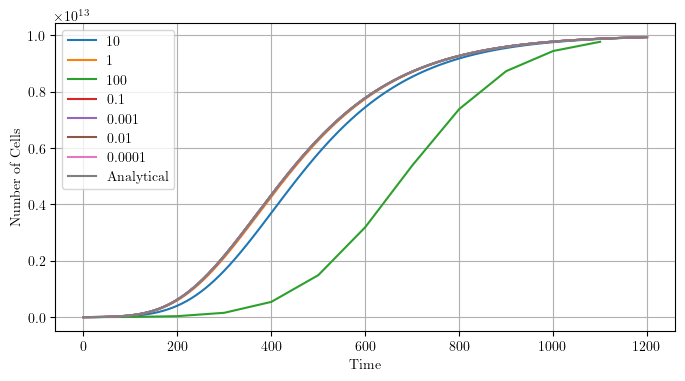

In [22]:
# solve analytically first
x = np.linspace(0, 1200, 2000)
y = 10 ** (13 - (4 * (np.e ** (-0.006 * x))))
analytical = pd.DataFrame({'time': x, 'cells': y})

# plot the number of cells over time for all h
plt.figure(figsize=(8, 4))
for name, record in data.items():
    plt.plot(record['df']['time'], record['df']['cells'], label=f'{10 ** record["m"]}')
plt.plot(analytical['time'], analytical['cells'], label='Analytical')
plt.xlabel('Time')
plt.ylabel('Number of Cells')
plt.legend()
plt.grid(True)
plt.show()

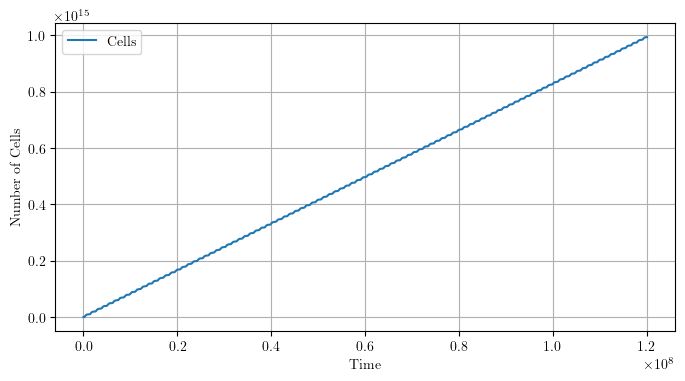

In [23]:
# plot the number of cells over time
plt.figure(figsize=(8, 4))
plt.plot(df_2_total['time'], df_2_total['cells'], label='Cells')
plt.xlabel('Time')
plt.ylabel('Number of Cells')
plt.legend()
plt.grid(True)
plt.show()